# Тематическое моделирование
* [Тематическое моделирование средствами BigARTM](https://habrahabr.ru/post/334668/)
* [Рекомендательные системы: LDA](https://habrahabr.ru/company/surfingbird/blog/150607/)
* [Вероятностные модели: от наивного Байеса к LDA, часть 1](https://habrahabr.ru/company/surfingbird/blog/228249/)
* [Вероятностные модели: LDA, часть 2](https://habrahabr.ru/company/surfingbird/blog/230103/)
* [Introduction to Latent Dirichlet Allocation](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation//)
* [Gensim FAQ](https://github.com/RaRe-Technologies/gensim/wiki/Recipes-&-FAQ)

Методы тематического моделирования находят всё более широкое применение для анализа текстов в социальных науках. Выделение скрытой тематической структуры в корпусе текстов может быть полезно для решения многих социологических задач, таких как определение политических предпочтений (Junqué de Fortuny и др. 2012) и тенденций (DiMaggio и др.), выявление коммуникативных различий между различными сообществами в социальной сети (Кольцов и др. 2014) и уточнение результатов традиционных опросов (O’Connor и др. 2010).

Построение тематическое модели может рассматриваться как задача одновременной кластеризации документов и слов по одному и тому же множеству кластеров, называемых темами. В терминах кластерного анализа тема – это результат би-кластеризации, то есть одновременной кластеризации и слов, и документов по их семантической близости. Обычно выполняется нечёткая кластеризация, то есть документ может принадлежать нескольким темам в различной степени. Полученное таким образом сжатое семантическое описание слова или документа представляет собой вероятностное распределение на множестве тем. Процесс нахождения этих распределений и называется тематическим моделированием (Коршунов, Гомзин 2012).
Самый популярный алгоритм вероятностного тематического моделирования — Латентное размещение Дирихле или LDA — является примером такого типа кластеризации. В качестве своего конечного продукта он возвращает матрицу вероятностей принадлежности слов w к темам t и матрицу вероятностей принадлежности документов d к темам (Blei и др. 2003). Эти матрицы получаются путём разложения матрицы частот слов в произведение двух матриц меньшего размера (Формула 1):
$$p(w│d)= \sum_{t∈T}(p(w│t)×p(t│d)$$

## Проблема 1. Предварительная обработка текстов
Первая проблема непосредственно не касается тематического моделирования, а связана с этапом предварительной обработки текстов. Поскольку тексты на естественном языке относятся к неструктурированным или слабоструктурированным данным, перед применением автоматических методов анализа крайне важно провести их тщательный препроцессинг, который является более трудоемкой процедурой, по сравнению с препроцессингом числовых данных (Miner и др. 2012). Предварительная обработка текстов преследует две основных цели: во-первых, она придаёт «сырым» текстам некоторую структуру, а во-вторых, уменьшает размерность данных, что может сократить время, затраченное на анализ, в десятки раз.
Основные этапы предварительной обработки текстов хорошо известны и включают в себя 1) токенизацию, 2) лемматизацию и 3) удаление-стоп слов. Каждый из этапов имеет свои тонкости и таит в себе возможности для улучшения качества модели.

## Проблема 2. Определение понятия темы
Второй проблемой является сложность определение понятия темы в тематическом моделировании, которое отличается от общепринятого, когда под темой понимается некоторое семантическое единство, выражающее предмет рассуждения или изложения. Как уже говорилось, в алгоритмах тематического моделирования тему образуют слова, часто встречающиеся вместе в одном документе: метод основывается на предположении, что на вероятность появления каждого слова в документе влияет некоторая латентная переменная, которая и называется темой (именно поэтому модель LDA относят к так называемым порождающим моделям — она описывает процесс порождения слов в документе под влиянием тем). 

При проведении тематического моделирования на текстах социальной сети «Вконтакте» мы столкнулись с выделением тем, которым не всегда можно соотнести какой-либо предмет изложения. Часто, темы группируются вокруг названий цветов, месяцев, обсценной лексики. Решением этой проблемы, на мой взгляд, отчасти может стать понимание «темы» как «дискурса». Понятие дискурса допускает расширенное толкование темы как языка, употребляемого в определённом дискурсивном контексте. Такое определение более корректно описывает различие между выделенными латентными переменными, которое часто заключается именно в лексике, а не семантике.

Другая проблема, связанная с содержанием тем, — это наличие так называемых «мусорных» или не интерпретируемых тем, которые состоят из не связанных друг с другом слов. При столкновении с такими темами следует отобрать несколько десятков текстов, относящихся к данной теме с наибольшей вероятностью и просмотреть их — возможно, это поможет интерпретировать тему более точно. Так или иначе, наличие некоторого количества «мусорных» тем — нормальное явление в тематическом моделировании, которого, тем не менее, надо старательно избегать, проводя качественный препроцессинг документов и выбирая оптимальное количество тем для модели.

## Проблема 3. Определение количества тем
Определение оптимального числа тем – важная подзадача в тематическом моделировании, поскольку выбор уровня обобщения существенно влияет на осмысленность получаемого набора тем. Занижение числа тем приводит к чрезмерно общим результатам, завышение же чревато сложностями интерпретации. Оптимальное число тем зависит от числа документов в анализируемом корпусе: в малых корпусах оптимальным является, как правило, меньшее число тем. Согласно оригинальному исследованию (Blei и др. 2003), оптимальное число тем для корпуса из 16333 новостных статей составило 100, тогда как для корпуса из 5225 аннотаций научных статей – 50. Однако не существует однозначного метода определения оптимального количества тем, и часто это количество определяется «на глазок», исходя из личного мнения исследователя.
Для определения оптимального числа тем в тематических моделях используются различные метрики качества, наиболее распространённой из которых является перплексия (perplexity).  Перплексия определяется логарифмом правдоподобия, нормализованным длинной документа, и показывает, насколько хорошо модель приближает наблюдаемые частоты появления слов в документах (Blei и др. 2003: 1008) (Формула 2). Другие названия перплексии – мера неопределённости, мера неуверенности или показатель несвязности.

Для измерения перплексии необходимо разделить выборку на две части – тренировочную – которая будет использоваться при построении модели, и тестовую, на которой будет проверяться точность предсказаний модели, а затем на текстовой выборке рассчитать показатель перплексии для моделей с разным количеством тем. Чем меньше перплексия, тем менее «неожиданными» оказались тестовые данные для построенной модели, а значит, тем выше её качество. Однако стоит помнить, что поскольку перплексия зависит от мощности словаря,  при помощи этого показателя можно сравнивать тематические модели, построенные на одних и тех же данных и различающиеся лишь числом тем.

Более существенной проблемой этого показателя является то, что результаты оценки моделей при помощи перплексии не всегда совпадают с результатами человеческих суждений (Chang и др. 2009). Это говорит о том, ни перплексия, ни любая из множества других автоматически рассчитываемых метрик качества не является абсолютно надёжным критерием для определения числа тем. Не следует слишком формально подходить к его выбору, поскольку в первую очередь количество тем зависит от исследовательской задачи, которая может предполагать более высокий или низкий уровень обобщениях исследуемых текстов. Исходя из неё целесообразно сузить диапазон тем до нескольких десятков штук, а уже затем использовать автоматические методы в сочетании с ручным кодированием для определения наиболее подходящей модели.

## Проблема 4. Стабильность тем
У алгоритмов тематического моделирования присутствует одна особенность,  — при каждом запуске модели на одних и тех же текстах и с одинаковыми параметрами получаются немного различные темы. Эта особенность обусловлена тем, что задача разложения матриц, описанная в Формуле 1, относится к классу некорректно поставленных или недоопределённых математических задач и имеет бесконечное множество решений. По этой причине,  прежде, чем начинать интерпретацию тем в тематической модели, следует убедиться, что полученные темы стабильно воспроизводятся в разных моделях (обычно сравнивается три-пять моделей), построенных с одними и теми же параметрами. Удаление нестабильных тем позволяет уменьшить тематическую размерность и облегчить труд кодировщиков.
Для расчёта стабильности удобно пользоваться функционалом, заложенным в программу TopicMiner , в которой для этой цели используется модифицированная мера Кульбака-Лейблера. В исходной формулировке расстояние Кульбака-Лейблера даёт оценку удалённости двух вероятностных распределений друг от друга. Метрика, используемая в TopicMiner возвращает данное расстояние, рассчитанное для каждой пары тем из двух тематических решений и делённое на его максимальное значение. Полученное таким образом значение лежит в промежутке от 0 до 100%, где 100% соответствует максимальному совпадению тем в двух тематических решениях.

## Проблема 5. Выявление нужных тем
Использование тематического моделирования в социологических исследованиях обычно предполагает выделение определённого набора тем, интересующих исследователя. Проблема работы большинства таких алгоритмов заключается в том, что не всегда нужные темы могут выделиться из массива текстов по причине их малой распространённости. Решением этой проблемы могло бы стать увеличение количества тем и их дробление до такой степени, когда интересующие темы выделятся естественным образом. Однако, в таком случае, во весь рост встанет уже ранее освещавшаяся проблема стабильности — чем большее количество тем будет задано, тем менее стабильными они получатся. К тому же интерпретация большого количества тем может занять много времени.
Решению проблемы выделения нужных тем могут помочь алгоритмы тематического моделирования с частичным обучением (semi-supervised). Для работы с ними необходимо выделить слова, наличие которых в тексте, по мнению исследователя, свидетельствуют о его принадлежности к изучаемой тематике. Вероятности этих слов в темах, затем, фиксируются и не пересчитываются в процессе работы алгоритма. 
 Для решения социологических задач в Лаборатории Интернет-исследований ВШЭ была создана модификация метода тематического моделирования с частичным обучением под названием ISLDA (Nikolenko, Koltcov, Koltsova 2016). Его отличие от других подобных решений заключается в том, что этот метод позволяет присваивать каждому набору ключевых слов несколько тем, в то время как в классическом semi-supervised LDA каждый набор слов может принадлежать только к одной теме. Эта модификация позволяет более гибко задавать темы и вычленять необходимые тексты.

## Проблема 6. Моделирование медиатекстов
Тематическое моделирование хорошо работает на классических текстовых документах, главными признаками которых являются целостность, связность и  законченность. Под цельностью понимается тематическое, концептуальное и модальное единство текста (Валгина 2003: 29). Предполагается, что текст имеет содержательную организацию, направленную на достижение какой-то цели и выражающуюся в единстве темы. Этот текст имеет как правило одну модальность и носит вербальный характер.

Однако в последние годы лингвисты замечают, что тексты массовой коммуникации отличаются от этого определения. В рамках медиалингвистики было предложено понятие медиатекста, отражающее новые реалии существования текста в медиасреде. Выделяют множество его характеристик (Казак 2012), из которых самыми существенными для нас будут смысловая незавершённость и поликодовость. Иначе говоря, этим текстам не всегда можно сопоставить какой-то определённый предмет изложения, и они могут содержать в себе по-разному закодированную информацию (вербальный текст, изображения, видео, аудио и др.)

Все эти характеристики медиатекста становятся ещё более выражены в текстах социальных медиа. Пост пользователя социальной сети может состоять из набора изображений, аудиофайла, пары слов, эмотикона и выражать неуловимые оттенки душевного состояния его автора. Эти тексты наиболее неподатливы для алгоритмов тематического моделирования. Вербальный текст, который обычно является исходным материалом для этих алгоритмов, в них слишком короток для корректного определения слов, часто встречающихся друг с другом (т. е. тем), нередко он не несёт основной смысловой нагрузки, а лишь поясняет содержание прикреплённых к нему медиа-файлов. Эти особенности медиатекстов затрудняют возможности применения к ним алгоритмов тематического моделирования. И если с их принципиальной смысловой незавершённостью поделать ничего нельзя, то с другими особенностями — низкой длинной и поликодовостью — бороться можно.

Адаптация метода тематического моделирования для работы с короткими текстами происходит по двум направлениям — трансформация данных и модификация самого алгоритма. Первая группа способов проще в применении, а потому используется чаще. В качестве примера можно привести исследования по тематическому моделированию текстов из социальной сети Twitter, длинна которых ограничена 140 символами (Weng и др. 2010). Авторы этих исследований объединяли все тексты одного автора в единый документ и подавали совокупность этих документов в качестве входных данных для алгоритмов тематического моделирования. Именно этот подход был использован нами для тематического моделирования текстов со стен пользователей социальной сети. На модели со 150 темами это позволило достичь результата в 107 интерпретируемых тем, что было намного лучше результата, полученного на исходных текстах.

Другая возможность улучшения качества тематической модели через трансформацию данных состоит в использовании n-грамм. Под n-граммами в компьютерной лингвистике понимается набор из n слов. Чаще всего используются биграммы и триграммы, состоящие из двух и трёх слов соответственно. Они добавляются к текстам, прошедшим этап предварительной обработки и трактуются как отдельный токен.

Дальнейшие поиски в направлении улучшения результатов тематического моделирования на коротких текстах привели к модификации самих алгоритмов и возникновению таких моделей как Twitter-LDA (Zhao и др. 2011), где у каждого пользователя предполагается наличие собственного тематического распределения, из которого при написании сообщения он выбирает только одну тему, или в чем-то похожую на него Ailment Topic Aspect Model (Paul, Dredze 2014) — тематическую модель с частичным обучением, созданную для поиска информации о болезнях в Twitter. Недостатком этих решений является сложность их практического использования.

Следующая особенность медиатекстов — мультимодальность или поликодовость — также может быть учтена в алгоритмах тематического моделирования. Существуют множество модификаций алгоритма тематического моделирования, которые учитывают авторство текста, его категории, время написания и др. Проблема состоит в том, что каждая из этих моделей годится для решения своей отдельной задачи и предоставляет возможности задания произвольных модальностей. Для решения этой и других проблем группой российских исследователей под руководством Константина Воронцова был предложен подход к построению тематических моделей, реализованный в библиотеке BigARTM (Vorontsov и др. 2015), который, среди прочего, учитывает дополнительную по отношению к основному тексту информацию (Vorontsov, Yanina и др. 2015). Эти мультимодальные тематические модели способны формулировать темы, в конструирование которых разные модальности вносят различный вклад. Каждый тип таких данных образует отдельный словарь, который вводится в модель наряду с со словами, составляющими основной текст. Например, разумно предположить, что заголовки и ключевые слова точнее характеризуют тему документа, чем основной текст. В BigARTM исследователь, следуя этому предположению, может определить соответствующие слова в отдельную модальность и увеличить её значимость для определения темы. 

В другом случае, исследовательская задача может заключаться в предсказании пропущенных метаданных документа на основе тематического профиля основного текста — примером такой задачи является определение авторства. Мультимодальная тематическая модель может помочь и в этом случае, достаточно определить автора текста как отдельную модальность и обучить модель на текстах с известным автором. 


Загрузим данные

In [189]:
import pandas as pd
import numpy as np
import re

from pymystem3 import Mystem
m = Mystem()

from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
from pymongo import MongoClient

In [9]:
db = MongoClient().thesis

In [52]:
db.merged.find_one()

{'_id': ObjectId('54899b4037a80813c8efdd10'),
 'comments': ['В настоящее время он дает показания. Анна Давыдова Источник: http://bk55.ru/news/article/37963/ Как до-о-о-олго он их дает…'],
 'commentsCount': 1,
 'content': 'Женщина лишилась золотых изделий на сумму около 7 тысяч рублей прямо в салоне автобуса. Вчера, 31 августа, в полицию поступило сообщение о грабеже. Около 17 часов на остановке по улице Б. Хмельницкого прямо в салоне автобуса ограбили кондуктора одного из омских транспортных предприятий. По словам пострадавшей, неизвестный похитил у нее золотые изделия общей стоимостью почти 7 тысяч рублей. Подозреваемый вскоре был задержан, им оказался ранее судимый безработный 30-летний омич. В настоящее время он дает показания. ',
 'date': datetime.datetime(2014, 9, 1, 0, 0),
 'source': 'bk55_preprocessed',
 'title': 'В Омске пассажир автобуса украл у кондуктора золото',
 'url': 'http://www.bk55.ru/news/article/37963/'}

In [50]:
df = pd.DataFrame.from_records(list(db.merged.find().limit(15000)))

In [65]:
df.head()

_id  commentsCount  \
0  54899b4037a80813c8efdd10              1   
1  54899b4037a80813c8efdd11              1   
2  54899b4037a80813c8efdd60              0   
3  54899b4037a80813c8efdd12             10   
4  54899b4037a80813c8efdd13              8   

                                             content       date  \
0  Женщина лишилась золотых изделий на сумму окол... 2014-09-01   
1  По мнению охотоведа, такое поведение не свойст... 2014-09-01   
2  Пожар произошел сегодня в 20 часов вечера в Ки... 2014-08-18   
3  Сотрудники регионального МЧС накануне встретил... 2014-09-01   
4  В Госдуму РФ 28 августа был внесен законопроек... 2014-09-01   

              source                                              title  \
0  bk55_preprocessed  В Омске пассажир автобуса украл у кондуктора з...   
1  bk55_preprocessed  В Омской области полиция ищет медведя, напавше...   
2  bk55_preprocessed                   Горела жилая многоэтажка в Омске   
3  bk55_preprocessed          В Омск прибыли еще 30 беженцев из Украины   
4  bk55_preprocessed  Удастся ли государству контролировать рост цен...   

                                      url  \
0  http://www.bk55.ru/news/article/37963/   
1  http://www.bk55.ru/news/article/37958/   
2  http://www.bk55.ru/news/article/37345/   
3  http://www.bk55.ru/news/article/37964/   
4  http://www.bk55.ru/news/article/37955/   

                                        preprocessed  
0  [в,  , омск,  , пассажир,  , автобус,  , украс...  
1  [в,  , омский,  , область,  , полиция,  , иска...  
2  [гореть,  , жилой,  , многоэтажка,  , в,  , ом...  
3  [в,  , омск,  , прибыль,  , еще,  , 30,  , беж...  
4  [удаваться,  , ли,  , государство,  , контроли...

In [64]:
df["preprocessed"] = df.apply(lambda row: "{} {}".format(row["title"], row["content"]), axis=1)\
                        .apply(m.lemmatize)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/pymongo/mongo_client.py", line 1195, in _process_periodic_tasks
    self._kill_cursors(cursor_ids, address, topology)
  File "/usr/local/lib/python3.6/site-packages/pymongo/mongo_client.py", line 1126, in _kill_cursors
    server = topology.select_server_by_address(tuple(address))
  File "/usr/local/lib/python3.6/site-packages/pymongo/topology.py", line 237, in select_server_by_address
    address)
  File "/usr/local/lib/python3.6/site-packages/pymongo/topology.py", line 214, in select_server
    address))
  File "/usr/local/lib/python3.6/site-packages/pymongo/topology.py", line 189, in select_servers
    self._error_message(selector))
pymongo.errors.ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused


In [69]:
def remove_white_and_punct(tokens):
    tokens = filter(lambda token: not bool(re.match("^[\s\W]+$", token)), tokens)
    return list(tokens)

In [71]:
df["preprocessed"] = df["preprocessed"].apply(remove_white_and_punct)

In [80]:
df["preprocessed"].head()

0    [пассажир, автобус, украсть, кондуктор, золото...
1    [полиция, искать, медведь, нападать, человек, ...
2    [гореть, жилой, многоэтажка, пожар, происходит...
3    [прибыль, 30, беженец, украина, сотрудник, рег...
4    [удаваться, государство, контролировать, рост,...
Name: preprocessed, dtype: object

In [74]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/hun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from collections import Counter
c = Counter()
for _id, doc in df["preprocessed"].iteritems():
    c.update(doc)

In [76]:
most_freq = [w for w, c in c.most_common(30)]
most_rare = [w for w, c in c.items() if c < 6]

In [77]:
stopw = set(most_freq + most_rare + stopwords.words("russian"))

In [78]:
len(c), len(stopw)

(70919, 47249)

In [79]:
df["preprocessed"] = df["preprocessed"].apply(
    lambda tokens: [token for token in tokens if token not in stopw])

In [81]:
df["title"] = df["title"].apply(lambda x: x.replace(";", " ").replace("\n", " ").replace("\r", " "))
df["content"] = df["content"].apply(lambda x: x.replace(";", " ").replace("\n", " ").replace("\r", " "))

In [129]:
df.sample(n=15000).to_csv("omsk_news.csv.gz", compression="gzip")

In [88]:
from gensim.corpora.textcorpus import TextCorpus
from gensim.corpora.dictionary import Dictionary

In [89]:
g_dict = Dictionary(df["preprocessed"].tolist())

In [91]:
print(g_dict)

Dictionary(23699 unique tokens: ['пассажир', 'автобус', 'украсть', 'кондуктор', 'золото']...)


In [102]:
g_dict.doc2bow(document=["мама", "мыла", "раму"])

[(3889, 1)]

In [104]:
g_dict.token2id["мама"]

3889

In [100]:
g_dict.filter_extremes(no_below=5, no_above=0.5, keep_n=100000, keep_tokens=None)

In [ ]:
g_dict.compactify()

In [105]:
corpus = [g_dict.doc2bow(text) for _id, text in df["preprocessed"].items()]

In [115]:
df["bow"] = df["preprocessed"].apply(lambda doc: g_dict.doc2bow(doc))

In [116]:
df.head()

_id  commentsCount  \
0  54899b4037a80813c8efdd10              1   
1  54899b4037a80813c8efdd11              1   
2  54899b4037a80813c8efdd60              0   
3  54899b4037a80813c8efdd12             10   
4  54899b4037a80813c8efdd13              8   

                                             content       date  \
0  Женщина лишилась золотых изделий на сумму окол... 2014-09-01   
1  По мнению охотоведа, такое поведение не свойст... 2014-09-01   
2  Пожар произошел сегодня в 20 часов вечера в Ки... 2014-08-18   
3  Сотрудники регионального МЧС накануне встретил... 2014-09-01   
4  В Госдуму РФ 28 августа был внесен законопроек... 2014-09-01   

              source                                              title  \
0  bk55_preprocessed  В Омске пассажир автобуса украл у кондуктора з...   
1  bk55_preprocessed  В Омской области полиция ищет медведя, напавше...   
2  bk55_preprocessed                   Горела жилая многоэтажка в Омске   
3  bk55_preprocessed          В Омск прибыли еще 30 беженцев из Украины   
4  bk55_preprocessed  Удастся ли государству контролировать рост цен...   

                                      url  \
0  http://www.bk55.ru/news/article/37963/   
1  http://www.bk55.ru/news/article/37958/   
2  http://www.bk55.ru/news/article/37345/   
3  http://www.bk55.ru/news/article/37964/   
4  http://www.bk55.ru/news/article/37955/   

                                        preprocessed  \
0  [пассажир, автобус, украсть, кондуктор, золото...   
1  [полиция, искать, медведь, нападать, человек, ...   
2  [гореть, жилой, многоэтажка, пожар, происходит...   
3  [прибыль, 30, беженец, украина, сотрудник, рег...   
4  [удаваться, государство, контролировать, рост,...   

                                                 bow  
0  [(0, 1), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1...  
1  [(18, 1), (19, 2), (42, 1), (46, 1), (49, 2), ...  
2  [(24, 1), (55, 1), (67, 1), (68, 1), (134, 1),...  
3  [(16, 1), (17, 1), (18, 1), (45, 2), (67, 1), ...  
4  [(10, 1), (18, 4), (20, 1), (31, 1), (32, 1), ...

# LSI
[Латентно-семантический анализ](https://habrahabr.ru/post/110078/)

Применяется SVD к term-document матрице: $A = U*S*V^t$

согласно теореме о сингулярном разложении[9], любая вещественная прямоугольная матрица может быть разложена на произведение трех матриц:

$\begin{matrix}A=USV^{T}\end{matrix}$ ,

где матрицы $\textbf  {U}$ и $\textbf  {V}$ – ортогональные, а $\textbf  {S}$ – диагональная матрица, значения на диагонали которой называются сингулярными значениями матрицы $\textbf  {A}$. 

Такое разложение обладает замечательной особенностью: если в матрице $S$ оставить только $k$ наибольших сингулярных значений, а в матрицах $U$ и $V$ – только соответствующие этим значениям столбцы, то произведение получившихся матриц $S$, $U$ и $V$ будет наилучшим приближением исходной матрицы $A$ к матрице $\hat A$ ранга $k$:

${\begin{matrix}{\hat  A}\approx A=USV^{T}\end{matrix}}$.

Основная идея латентно-семантического анализа состоит в том, что если в качестве матрицы $$A использовалась матрица термы-на-документы, то матрица $\hat  A$ , содержащая только $k$ первых линейно независимых компонент $A$, отражает основную структуру различных зависимостей, присутствующих в исходной матрице. Структура зависимостей определяется весовыми функциями термов.

Таким образом, каждый терм и документ представляются при помощи векторов в общем пространстве размерности $k$ (так называемом пространстве гипотез). Близость между любой комбинацией термов и/или документов легко вычисляется при помощи скалярного произведения векторов.

Как правило, выбор $k$ зависит от поставленной задачи и подбирается эмпирически. Если выбранное значение $k$ слишком велико, то метод теряет свою мощность и приближается по характеристикам к стандартным векторным методам. Слишком маленькое значение $k$ не позволяет улавливать различия между похожими термами или документами.

In [112]:
from gensim.models.lsimodel import LsiModel

In [117]:
lsi = LsiModel(corpus=df["bow"].tolist(), id2word=g_dict, num_topics=50)

In [171]:
lsi.projection.s #lsi.projection.u

array([ 631.06650445,  285.97864132,  253.77050032,  245.75788838,
        234.58524339,  225.64201366,  209.72688798,  202.00422113,
        194.42742122,  182.52446615,  178.99606732,  173.61629088,
        169.54820504,  159.24982951,  157.40689191,  154.80321956,
        152.70225039,  147.16876074,  145.25211491,  144.72728136,
        141.89201527,  139.0900535 ,  136.48345675,  135.10996582,
        134.70175381,  131.79671212,  129.8765452 ,  127.49349919,
        125.7529571 ,  124.63442002,  124.13718286,  121.8766816 ,
        120.93044992,  120.080664  ,  117.98377517,  116.34865164,
        115.07969295,  114.4353811 ,  112.91775526,  112.39799522,
        110.86003285,  109.08160767,  108.78877149,  108.47193214,
        107.69405421,  107.65441005,  106.66035334,  106.30823735,
        105.37469347,  104.32667549])

In [132]:
lsi.print_topics(num_topics=20, num_words=10)

[(0,
  '0.207*"весь" + 0.184*"россия" + 0.181*"человек" + 0.162*"мочь" + 0.136*"становиться" + 0.131*"город" + 0.126*"время" + 0.124*"рубль" + 0.110*"первый" + 0.107*"новый"'),
 (1,
  '-0.329*"россия" + 0.281*"рубль" + -0.225*"украина" + -0.181*"российский" + -0.178*"страна" + 0.165*"5" + 0.161*"улица" + 0.158*"г" + 0.157*"ореол" + 0.155*"2013"'),
 (2,
  '0.346*"рубль" + -0.327*"улица" + 0.203*"россия" + -0.197*"человек" + 0.195*"компания" + -0.148*"город" + -0.143*"ул" + 0.133*"суд" + -0.130*"весь" + -0.117*"огонь"'),
 (3,
  '-0.344*"улица" + -0.233*"россия" + 0.224*"ваш" + 0.201*"ореол" + -0.187*"ул" + 0.164*"г" + -0.151*"сообщать" + -0.143*"летний" + -0.127*"движение" + -0.124*"автомобиль"'),
 (4,
  '-0.299*"г" + -0.296*"ореол" + -0.286*"ваш" + -0.257*"россия" + -0.221*"2013" + 0.195*"город" + -0.181*"5" + -0.162*"украина" + 0.148*"рубль" + 0.140*"проект"'),
 (5,
  '-0.318*"улица" + 0.242*"дело" + 0.225*"суд" + 0.177*"летний" + 0.170*"гамбург" + 0.146*"уголовный" + -0.146*"город" + 

In [ ]:
from gensim.models.ldamodel import LdaModel

In [119]:
lda = LdaModel(corpus=df["bow"].tolist(), num_topics=50, id2word=g_dict)

In [165]:
lda.save("lda_model")

In [166]:
lda = LdaModel.load("lda_model")

In [136]:
lda.print_topics(num_topics=-1, num_words=10)

[(0,
  '0.041*"дом" + 0.021*"квартира" + 0.012*"кв" + 0.012*"здание" + 0.012*"площадь" + 0.010*"м" + 0.010*"жилой" + 0.010*"ремонт" + 0.008*"жилье" + 0.006*"помещение"'),
 (1,
  '0.009*"день" + 0.007*"губернатор" + 0.007*"назаров" + 0.007*"первый" + 0.006*"весь" + 0.006*"хороший" + 0.006*"становиться" + 0.006*"виктор" + 0.005*"министр" + 0.005*"человек"'),
 (2,
  '0.028*"строительство" + 0.018*"компания" + 0.016*"мостовик" + 0.015*"объект" + 0.011*"работа" + 0.009*"проект" + 0.009*"рубль" + 0.008*"сбербанк" + 0.008*"нпо" + 0.007*"ооо"'),
 (3,
  '0.011*"человек" + 0.008*"весь" + 0.008*"мочь" + 0.007*"наш" + 0.006*"самый" + 0.006*"говорить" + 0.005*"вопрос" + 0.005*"просто" + 0.005*"место" + 0.005*"новый"'),
 (4,
  '0.025*"полежаев" + 0.019*"леонид" + 0.011*"рождественский" + 0.010*"школа" + 0.009*"экзамен" + 0.009*"сдавать" + 0.009*"егэ" + 0.007*"предмет" + 0.007*"белов" + 0.006*"экс"'),
 (5,
  '0.014*"собака" + 0.013*"фильм" + 0.012*"животное" + 0.009*"друг" + 0.008*"весь" + 0.006*"кар

In [122]:
lda[df["bow"][0]]

[(6, 0.1788733266759856),
 (10, 0.029408247265349925),
 (23, 0.21345834787248191),
 (35, 0.19575164877665402),
 (37, 0.2251935988693734),
 (42, 0.14356483054015479)]

In [127]:
lda.get_document_topics(df["bow"][0], minimum_probability=.001)

[(6, 0.17880430180934265),
 (10, 0.029410649582091893),
 (23, 0.21351847457125836),
 (35, 0.19575910960834922),
 (37, 0.22525206928786715),
 (42, 0.14350539514109048)]

In [158]:
from gensim.models.coherencemodel import CoherenceModel

cm = CoherenceModel(model=lda, corpus=df["bow"].tolist(), coherence='u_mass')  # tm is the trained topic model
cm.get_coherence()

-3.4684617416173307

In [159]:
!pip3 install pyldavis

    100% |████████████████████████████████| 1.6MB 680kB/s ta 0:00:011
    100% |████████████████████████████████| 174kB 4.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyldavis ... done
  Stored in directory: /Users/hun/Library/Caches/pip/wheels/de/41/af/cba16e4c15ff942728f3345c8f165831b03ad7f4d87cff8b6e
  Running setup.py bdist_wheel for funcy ... done
  Stored in directory: /Users/hun/Library/Caches/pip/wheels/18/0f/e5/b3639e3103f00e7500e6a9df9c2c9a6fcff760e440c4664fa9
Successfully built pyldavis funcy


* [LDAvis: A method for visualizing and interpreting topics](https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
* https://github.com/cpsievert/LDAvis
* https://github.com/bmabey/pyLDAvis

In [163]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [164]:
pyLDAvis.gensim.prepare(lda, df["bow"].tolist(), g_dict)

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
3      5.900996        1       1  0.135433 -0.042668
37     4.950050        1       2 -0.171041 -0.075618
44     4.893685        1       3  0.095516  0.045669
14     4.099931        1       4  0.095231  0.130213
1      4.036561        1       5  0.158280 -0.097089
22     3.629506        1       6 -0.013192  0.172692
19     3.552147        1       7  0.051707  0.039066
48     3.525486        1       8  0.142892 -0.121123
12     3.410152        1       9 -0.057425  0.110773
27     3.374545        1      10  0.109298  0.006538
31     3.322735        1      11  0.136885  0.050361
42     2.974410        1      12 -0.289808 -0.147723
7      2.914603        1      13 -0.059956  0.167272
33     2.853176        1      14  0.116643 -0.012840
36     2.533664        1      15  0.058540 -0.054440
13     2.384215        1      16 -0.119777  0.089291
40     2.382365        1      17 -0.018291  0.175400
17     2.268695        1      18  0.087410  0.004312
0      2.151015        1      19 -0.080650  0.061412
2      2.135412        1      20 -0.005681  0.118986
9      1.958933        1      21 -0.176749 -0.083172
47     1.905996        1      22  0.063432  0.097507
35     1.896805        1      23 -0.148538 -0.048659
49     1.879240        1      24  0.079574 -0.144982
30     1.738897        1      25  0.151585 -0.172888
26     1.704300        1      26  0.074039 -0.094630
23     1.691626        1      27 -0.149973 -0.100286
43     1.597432        1      28  0.085615  0.032964
41     1.590070        1      29  0.088100  0.101222
6      1.439462        1      30 -0.137973  0.127554
21     1.410672        1      31  0.025046  0.107315
5      1.227922        1      32  0.123615 -0.154402
8      1.150267        1      33  0.013342  0.068232
29     1.118536        1      34 -0.019461  0.097136
38     1.057247        1      35 -0.064041 -0.068854
15     0.996372        1      36 -0.110744  0.085231
18     0.949743        1      37 -0.007597 -0.006594
24     0.872274        1      38  0.051083  0.059821
25     0.795940        1      39  0.094913  0.004747
28     0.789376        1      40 -0.227921 -0.029866
46     0.742947        1      41 -0.064467 -0.082652
10     0.660653        1      42  0.010106 -0.076781
34     0.652312        1      43  0.097639 -0.097887
4      0.503069        1      44  0.015464 -0.005038
32     0.490744        1      45 -0.023821 -0.008533
16     0.445890        1      46 -0.184112 -0.051662
39     0.381730        1      47 -0.037840 -0.076979
45     0.375919        1      48  0.037968  0.016173
11     0.372129        1      49 -0.058502 -0.154516
20     0.310149        1      50  0.028207  0.039996, topic_info=      Category          Freq                 Term         Total  loglift  \
term                                                                       
13     Default   8610.000000                рубль   8610.000000  30.0000   
1989   Default   3995.000000           автомобиль   3995.000000  29.0000   
687    Default   4969.000000                  суд   4969.000000  28.0000   
26     Default   4682.000000                улица   4682.000000  27.0000   
177    Default   4353.000000              ребенок   4353.000000  26.0000   
148    Default   4868.000000                  дом   4868.000000  25.0000   
12     Default   4483.000000               тысяча   4483.000000  24.0000   
1190   Default   2652.000000             водитель   2652.000000  23.0000   
161    Default   3273.000000              украина   3273.000000  22.0000   
2904   Default   2054.000000             авангард   2054.000000  21.0000   
46     Default   4614.000000               летний   4614.000000  20.0000   
72     Default   4657.000000                район   4657.000000  19.0000   
1464   Default   2024.000000                  сша   2024.000000  18.0000   
144    Default   8018.000000                город   8018.0000

$$relevance(w,k|\lambda) = \lambda * log(\phi_{wk}) + (1 - \lambda) * log(\frac{\phi_{wk}}{p_w}),$$

где 
* $\phi_{wk}$ — вероятность слова $w$ в теме $k$;
* $p_w$ — вероятность слова $w$ во всем корпусе.

In [121]:
df["topics"] = df["bow"].apply(lambda bow: lda[bow])


In [167]:
#lda[corpus]

In [128]:
df.head()

_id  commentsCount  \
0  54899b4037a80813c8efdd10              1   
1  54899b4037a80813c8efdd11              1   
2  54899b4037a80813c8efdd60              0   
3  54899b4037a80813c8efdd12             10   
4  54899b4037a80813c8efdd13              8   

                                             content       date  \
0  Женщина лишилась золотых изделий на сумму окол... 2014-09-01   
1  По мнению охотоведа, такое поведение не свойст... 2014-09-01   
2  Пожар произошел сегодня в 20 часов вечера в Ки... 2014-08-18   
3  Сотрудники регионального МЧС накануне встретил... 2014-09-01   
4  В Госдуму РФ 28 августа был внесен законопроек... 2014-09-01   

              source                                              title  \
0  bk55_preprocessed  В Омске пассажир автобуса украл у кондуктора з...   
1  bk55_preprocessed  В Омской области полиция ищет медведя, напавше...   
2  bk55_preprocessed                   Горела жилая многоэтажка в Омске   
3  bk55_preprocessed          В Омск прибыли еще 30 беженцев из Украины   
4  bk55_preprocessed  Удастся ли государству контролировать рост цен...   

                                      url  \
0  http://www.bk55.ru/news/article/37963/   
1  http://www.bk55.ru/news/article/37958/   
2  http://www.bk55.ru/news/article/37345/   
3  http://www.bk55.ru/news/article/37964/   
4  http://www.bk55.ru/news/article/37955/   

                                        preprocessed  \
0  [пассажир, автобус, украсть, кондуктор, золото...   
1  [полиция, искать, медведь, нападать, человек, ...   
2  [гореть, жилой, многоэтажка, пожар, происходит...   
3  [прибыль, 30, беженец, украина, сотрудник, рег...   
4  [удаваться, государство, контролировать, рост,...   

                                                 bow  \
0  [(0, 1), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1...   
1  [(18, 1), (19, 2), (42, 1), (46, 1), (49, 2), ...   
2  [(24, 1), (55, 1), (67, 1), (68, 1), (134, 1),...   
3  [(16, 1), (17, 1), (18, 1), (45, 2), (67, 1), ...   
4  [(10, 1), (18, 4), (20, 1), (31, 1), (32, 1), ...   

                                              topics  
0  [(6, 0.17884651819), (10, 0.0294147930584), (2...  
1  [(0, 0.0135307586025), (5, 0.114457090477), (2...  
2        [(0, 0.0676000716247), (9, 0.902399928375)]  
3  [(5, 0.0582230579484), (8, 0.541162197634), (9...  
4  [(3, 0.0101920915583), (13, 0.0566710454062), ...

http://qpleple.com/topic-coherence-to-evaluate-topic-models/

In [137]:
lda.top_topics(corpus=df["bow"])

[([(0.029455830334980278, 'украина'),
   (0.016184881447068727, 'россия'),
   (0.012857237701124119, 'военный'),
   (0.012095951339919565, 'украинский'),
   (0.011545816957966025, 'российский'),
   (0.008059581976391032, 'страна'),
   (0.0076396862797684728, 'киев'),
   (0.006753059792776437, 'заявлять'),
   (0.0060725981406209821, 'война'),
   (0.0059363621038500854, 'армия'),
   (0.0058841479246867102, 'сша'),
   (0.0057739904284573318, 'сторона'),
   (0.0055070767087611926, 'крым'),
   (0.0048335611799479082, 'весь'),
   (0.0046349646480139161, 'время'),
   (0.0044266718798796362, 'сообщать'),
   (0.0043715219244395542, 'мочь'),
   (0.0043628177665932912, 'территория'),
   (0.0043124117774688778, 'сила'),
   (0.0042508558197977943, 'власть')],
  -1.3390600615387978),
 ([(0.032207166604252387, 'город'),
   (0.014187279118393089, 'проект'),
   (0.013968279830171557, 'мэр'),
   (0.013288564367590201, 'городской'),
   (0.012484219394076403, 'двораковский'),
   (0.0094249953660852856, 'в

In [147]:
df["topics"]

0        [(6, 0.17884651819), (10, 0.0294147930584), (2...
1        [(0, 0.0135307586025), (5, 0.114457090477), (2...
2              [(0, 0.0676000716247), (9, 0.902399928375)]
3        [(5, 0.0582230579484), (8, 0.541162197634), (9...
4        [(3, 0.0101920915583), (13, 0.0566710454062), ...
5        [(0, 0.0120201541563), (9, 0.0309999575459), (...
6        [(1, 0.148766036028), (4, 0.067870491497), (14...
7        [(0, 0.0980343364129), (2, 0.227395338244), (6...
8        [(8, 0.0350003680983), (12, 0.240640166759), (...
9        [(0, 0.049716215546), (2, 0.813777215974), (22...
10       [(1, 0.440115645305), (5, 0.251067556286), (23...
11       [(0, 0.249736158224), (2, 0.0730635028253), (7...
12       [(0, 0.0918579176916), (2, 0.224136746201), (3...
13       [(8, 0.0265328245756), (13, 0.213470866482), (...
14       [(6, 0.0632456227542), (9, 0.778098595485), (2...
15       [(15, 0.162990832523), (41, 0.25764371846), (4...
16       [(3, 0.118432327532), (5, 0.0650398725891), (1.

In [148]:
df["topics"].apply(lambda x: dict(x))

0        {6: 0.17884651819, 10: 0.0294147930584, 23: 0....
1        {0: 0.0135307586025, 5: 0.114457090477, 20: 0....
2                  {0: 0.0676000716247, 9: 0.902399928375}
3        {5: 0.0582230579484, 8: 0.541162197634, 9: 0.2...
4        {3: 0.0101920915583, 13: 0.0566710454062, 22: ...
5        {0: 0.0120201541563, 9: 0.0309999575459, 27: 0...
6        {1: 0.148766036028, 4: 0.067870491497, 14: 0.3...
7        {0: 0.0980343364129, 2: 0.227395338244, 6: 0.0...
8        {8: 0.0350003680983, 12: 0.240640166759, 27: 0...
9        {0: 0.049716215546, 2: 0.813777215974, 22: 0.1...
10       {1: 0.440115645305, 5: 0.251067556286, 23: 0.0...
11       {0: 0.249736158224, 2: 0.0730635028253, 7: 0.0...
12       {0: 0.0918579176916, 2: 0.224136746201, 3: 0.3...
13       {8: 0.0265328245756, 13: 0.213470866482, 23: 0...
14       {6: 0.0632456227542, 9: 0.778098595485, 28: 0....
15       {15: 0.162990832523, 41: 0.25764371846, 46: 0....
16       {3: 0.118432327532, 5: 0.0650398725891, 11: 0..

In [151]:
topics_df = pd.DataFrame.from_records(df["topics"].apply(lambda x: dict(x))).fillna(0)

In [152]:
topics_df.head()

0    1    2         3    4         5         6    7         8   \
0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.178847  0.0  0.000000   
1  0.013531  0.0  0.0  0.000000  0.0  0.114457  0.000000  0.0  0.000000   
2  0.067600  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
3  0.000000  0.0  0.0  0.000000  0.0  0.058223  0.000000  0.0  0.541162   
4  0.000000  0.0  0.0  0.010192  0.0  0.000000  0.000000  0.0  0.000000   

         9  ...         40   41        42        43   44   45   46   47   48  \
0  0.000000 ...   0.000000  0.0  0.143522  0.000000  0.0  0.0  0.0  0.0  0.0   
1  0.000000 ...   0.000000  0.0  0.056969  0.348285  0.0  0.0  0.0  0.0  0.0   
2  0.902400 ...   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
3  0.225584 ...   0.000000  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.000000 ...   0.442861  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

    49  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 50 columns]

# Самостоятельная работа
1. Отсортируйте темы по их представленности.
2. Посчитайте и визуализируйте распределение тем по неделям.
3. Отсортируйте темы по комментируемости.

In [155]:
topics_df.sum().sort_values(ascending=False)

37    997.991743
42    814.549789
44    612.676885
14    550.529781
19    524.653135
12    518.333003
3     497.734884
22    490.035927
1     486.503780
9     469.838491
48    447.302459
7     440.237334
27    426.670871
36    422.325584
13    419.892325
31    380.442533
40    370.938312
0     334.520851
23    332.609333
2     316.149547
35    314.010026
49    307.067464
33    305.756772
17    282.879822
26    277.422913
47    260.348898
6     237.455703
41    234.755420
43    232.540832
21    213.474517
30    192.146550
8     180.060660
29    172.880187
38    170.265047
15    160.932391
5     158.026218
28    153.642587
46    128.310672
24    120.149324
25    104.290516
10    102.619146
18     88.563176
16     84.766099
34     77.925877
4      75.468953
39     66.103723
32     65.963213
11     63.849335
45     55.935381
20     43.051769
dtype: float64

In [157]:
df = pd.concat([df, topics_df], axis=1)

In [177]:
by_weeks = df.groupby([df.date.dt.year, df.date.dt.week])

In [178]:
by_weeks.size()

date  date
2013  1        74
      35       16
      36      219
      37      221
      38      248
      39      247
      40      244
      41      249
      42      248
      43      238
      44      237
      45      206
      46      249
      47      254
      48      239
      49      237
      50      261
      51      274
      52      263
2014  1        76
      2       165
      3       244
      4       282
      5       277
      6       293
      7       283
      8       269
      9       317
      10      308
      11      260
      12      281
      13      303
      14      303
      15      308
      16      294
      17      316
      18      246
      19      280
      20      306
      21      324
      22      331
      23      330
      24      229
      25      320
      26      286
      27      297
      28      286
      29      308
      30      390
      31      461
      32      443
      33      449
      34      427
      35      444
      36       40

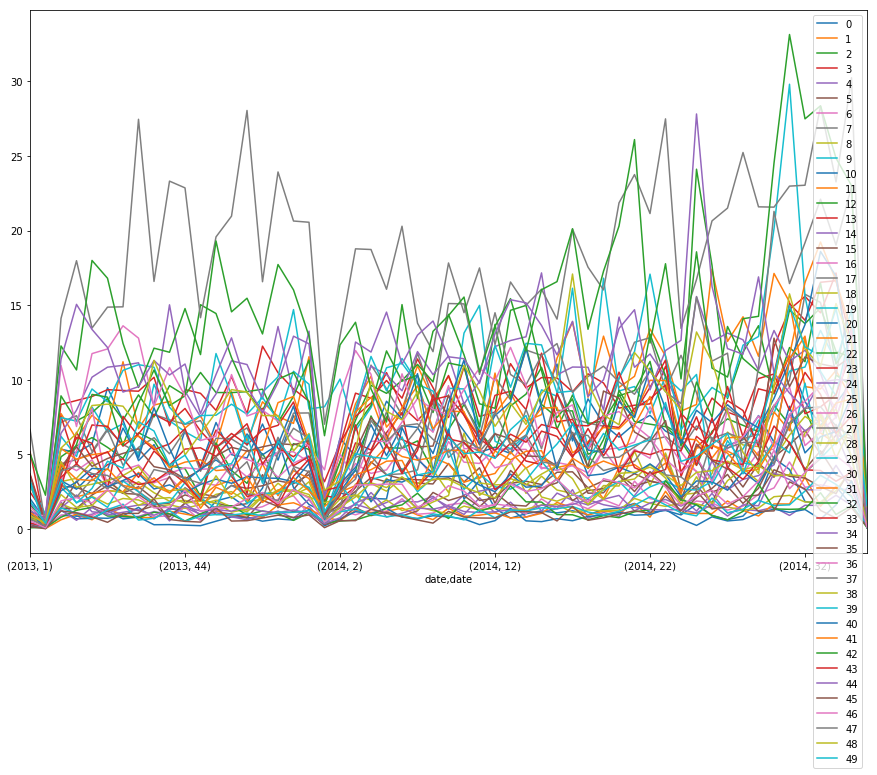

In [198]:
by_weeks[list(range(50))].sum().plot(figsize=(15, 10))

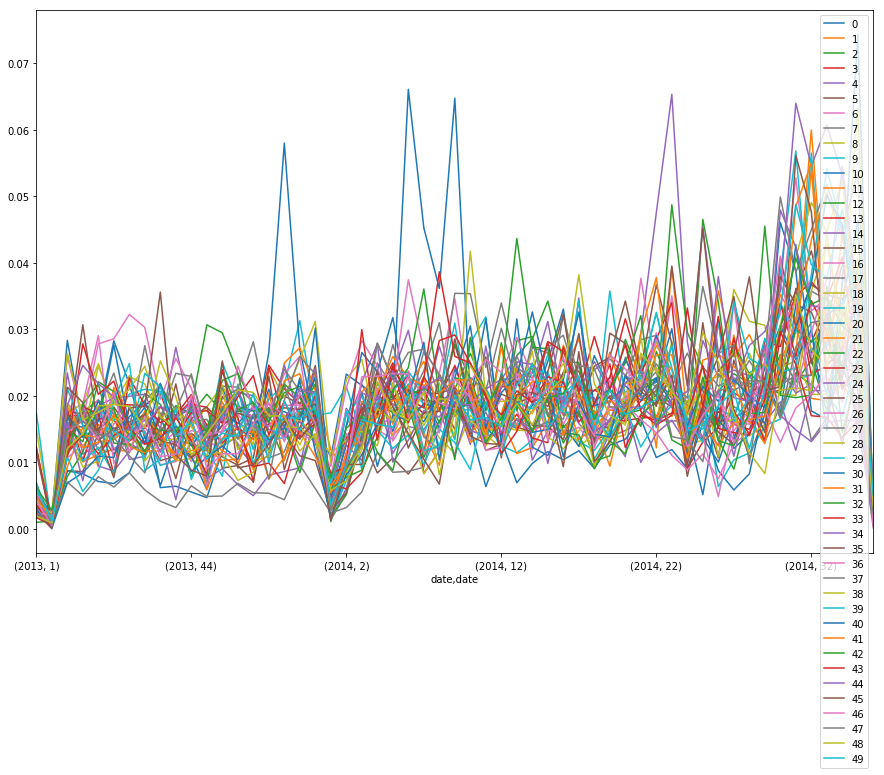

In [197]:
(by_weeks[list(range(50))].sum()/df[list(range(50))].sum()).plot(figsize=(15, 10))

Другие тематические модели:
* Dynamic Topic Model ([gensim](https://radimrehurek.com/gensim/models/ldaseqmodel.html)). В LDA порядок слов в документе, и порядок появляения документов в корпусе не учитываются модель. В динамической тематической модели порядок документов играет фундаментальную роль. Документы сгруппированы по временным фрагментам (например, годам), и предполагается, что документы каждой группы исходят из набора тем, которые эволюционировали из набора предыдущего фрагмента.
* Author-topic Model ([gensim](https://radimrehurek.com/gensim/models/atmodel.html))
* Structural Topic Model ([R](http://www.structuraltopicmodel.com/))
* [BigARTM](http://bigartm.org/)